In [1]:
import gym_bandits
import gym
import numpy as np
import math
import random
np.random.seed(1234)
env = gym.make("BanditTenArmedGaussian-v0")


ModuleNotFoundError: No module named 'gym_bandits'

In [2]:
# number of rounds (iterations)
num_rounds = 20000

# Count of number of times an arm was pulled
count = np.zeros(10)

# Sum of rewards of each arm
sum_rewards = np.zeros(10)

# Q value which is the average reward
Q = np.zeros(10)

# initialize alpha and beta values 因為要配合beta distribution alpha-1 , beta-1 關係
# alpha = np.ones(10)
# beta = np.ones(10)
alpha = np.zeros(10)
beta = np.zeros(10)

# ---------------------------------
# sum_rewards[0..9] :  十台拉霸機 累積獎賞

# count[0..9]       :  十台拉霸機 各被玩幾次

# Q[0..9]           :  十台拉霸機 個別拉霸機 平均收益

In [3]:
# import numpy as np
# np.random.beta?

In [4]:
# 找出最佳拉霸機的號碼 根據理論 The Thompson sampling algorithm
def thompson_sampling(alpha,beta):
# Alpha represents the number of times we receive the positive rewards
# Beta represents the number of times we receive the negative rewards
    samples = [np.random.beta(alpha[i]+1,beta[i]+1) for i in range(10)]
    # 如果加上1 就可以用 np.zeros 給 alpha beta 否則 不加1 就是用 np.ones
    return np.argmax(samples)
# 將 action 想成 0..9 之間的拉霸機

In [5]:
for i in range(num_rounds):

 # Select the arm using thompson sampling
 arm = thompson_sampling(alpha,beta)

 # Get the reward
 observation, reward, done, info = env.step(arm) 

 # update the count of that arm
 count[arm] += 1

 # Sum the rewards obtained from the arm
 sum_rewards[arm]+=reward

 # calculate Q value which is the average rewards of the arm
 Q[arm] = sum_rewards[arm]/count[arm]

 # If it is a positive reward increment alpha
 if reward >0:
    alpha[arm] += 1

 # If it is a negative reward increment beta
 else:
    beta[arm] += 1

print( 'The optimal arm is {}'.format(np.argmax(Q)))


The optimal arm is 2


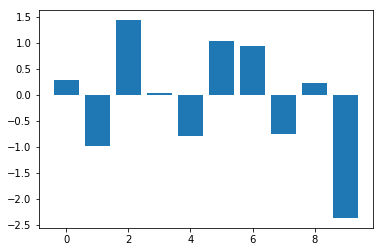

In [6]:
# 繪圖每一台拉霸機 個別拉霸機 平均收益
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(Q)),  Q  )
plt.show()

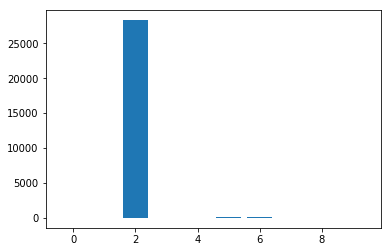

In [7]:
# 繪圖每一台拉霸機 sum_rewards
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(sum_rewards)),  sum_rewards  )
plt.show()

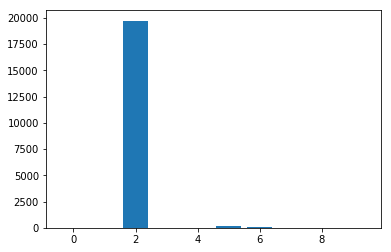

In [8]:
# 繪圖每一台拉霸機 count
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(count)),  count  )
plt.show()